In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
def phase_add(a, b):
    a_ = np.cos(a) + np.sin(a)*1j
    b_ = np.cos(b) + np.sin(b)*1j
    return np.angle(a_*b_)

def phase_statics(X):
    a = 0
    for x in X: a += ( np.cos(x) + np.sin(x)*1j)
    a /= len(X)
    return np.angle(a), 1-np.abs(a)

def getAngleDensityMap(hist_phase, size = 512):
    img = np.zeros([size, size])
    center = [size / 2, size/2]
    print hist_phase
    for i in range(size): # y 
        for j in range(size): # x
            pos = ( j - center[1] ) + 1j*( i - center[0] )
            if np.abs(pos) < size / 2:
                img[i,j] = hist_phase[int( - ( np.angle( pos ) + np.pi ) / (0.1*np.pi) )]
    return img


In [3]:
data_dir = "/Volumes/HD-PLFU3/AnalysisResult/"
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"
winrad = 4

In [4]:
df = pd.read_csv(df_path)
data = np.zeros([len(df), 3])
for i in range(len(df)):
    s = df.loc[i,:]    
    sess_dir = data_dir+"{0}/C001H001S{1:0>4}/".format(s.sample, s.session)
    #print i, sess_dir
    
    pmap_data = np.load(sess_dir+'/pmap.npy')
    
    phases = pmap_data[s.frame_start, s.stim_x - winrad:s.stim_x+winrad, s.stim_y - winrad:s.stim_y+winrad]
    phases = phases.flatten()
    stim_point_phase, _ = phase_statics(phases)
    vec_stim = ((s.stim_x - s.pre_x) + 1j*(s.stim_y - s.pre_y))    
    vec_shift = ((s.pst_x - s.pre_x) + 1j*(s.pst_y - s.pre_y))
    
    data[i,:] = np.array([stim_point_phase, np.angle(vec_stim), np.abs(vec_shift)])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


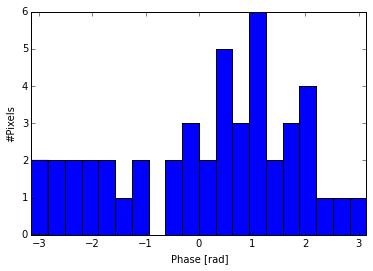

[ 2.  2.  2.  2.  2.  1.  2.  0.  2.  3.  2.  5.  3.  6.  2.  3.  4.  1.
  1.  1.]


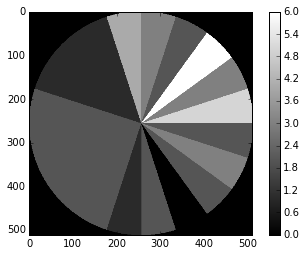

In [15]:
hist_phase, _, _ = plt.hist(data[:,0], np.arange(-np.pi, np.pi+0.05*np.pi, 0.1*np.pi))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Pixels")
plt.show()

img = getAngleDensityMap(hist_phase)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

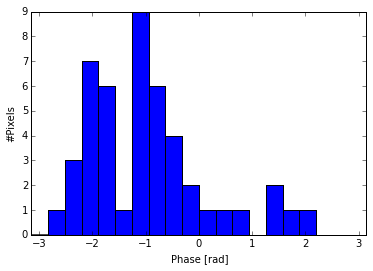

[ 0.  1.  3.  7.  6.  1.  9.  6.  4.  2.  1.  1.  1.  0.  2.  1.  1.  0.
  0.  0.]


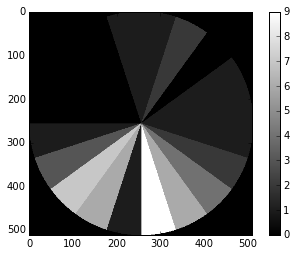

In [16]:
hist_phase, _, _ = plt.hist(data[:,1], np.arange(-np.pi, np.pi+0.05*np.pi, 0.1*np.pi))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Pixels")
plt.show()

img = getAngleDensityMap(hist_phase)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
#thre = np.max(data[:,2])*0.5
thre = np.mean(data[:,2])

x =  np.cos(data[:,0])
y = np.sin(data[:,0])
x *= np.absolute(np.cos(data[:,1]))
y *= np.absolute(np.cos(data[:,1]))

rgb = (np.c_[data[:,2], data[:,2], data[:,2]] > thre)*1.0

fig, ax = plt.subplots()
ax.scatter(x, y, s=20, facecolors=rgb)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()